# 05 Model Interpretation and Reporting

In this section, we interpret the best-performing models, analyze feature contributions, and generate actionable insights using SHAP, partial dependence plots, and concise reporting.


## 5.1 Import Libraries and Reload Data/Models

In [1]:

import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
import joblib
import pickle

C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Reload selected features and label encoder
X_test_sel = pd.read_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\X_test_selected.csv')
y_test = pd.read_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\y_test.csv').squeeze()

In [7]:
import joblib

rb_best = joblib.load(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\outputs\rf_best_model.pkl')
svm_best = joblib.load(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\outputs\svm_best_model.pkl')
xgb_best = joblib.load(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\outputs\xgb_best_model.pkl')

In [8]:
model = xgb_best

## 5.2 Global Model Explainability with SHAP

In [11]:
import pandas as pd
# Save processed feature sets and labels for next notebook
X_train_sel = pd.read_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\X_train_selected.csv', index_col=0)
X_test_sel = pd.read_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\X_test_selected.csv', index_col=0)
y_train = pd.read_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\y_train.csv')
y_test = pd.read_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\y_test.csv')

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)  # y_train should be your actual target labels
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


 98%|===================| 1563/1600 [00:40<00:00]        

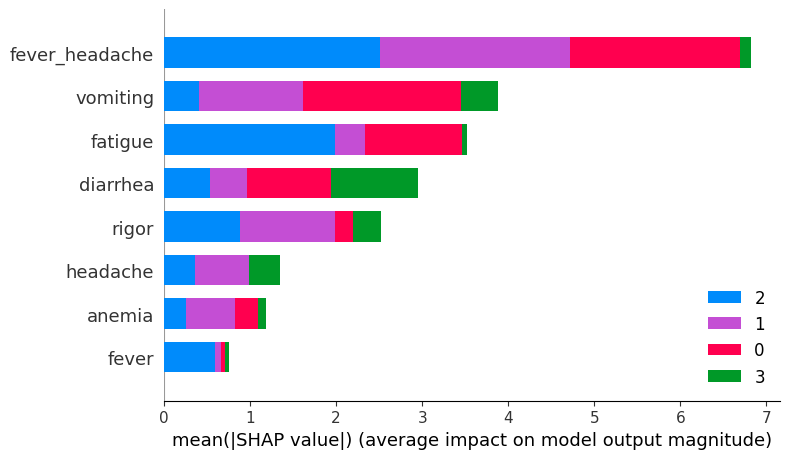

In [13]:

explainer = shap.Explainer(model, X_test_sel)
shap_values = explainer(X_test_sel)

# SHAP summary plot for global feature importance
shap.summary_plot(shap_values, X_test_sel, class_names=le.classes_)

## 5.3 Local Explanation for an Individual Prediction

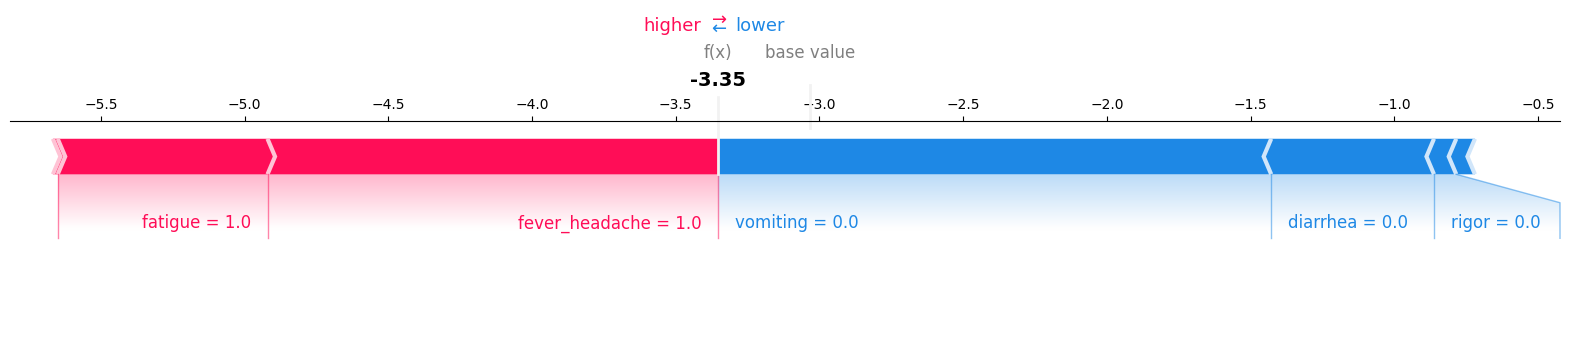

In [ ]:
CLASS_IDX = 0  
idx = 0       

shap.initjs()
shap.force_plot(
    explainer.expected_value[CLASS_IDX],   # base value for this class
    shap_values.values[idx, :, CLASS_IDX], # SHAP values for this sample and class
    X_test_sel.iloc[idx],
    matplotlib=True,
    show=True
)

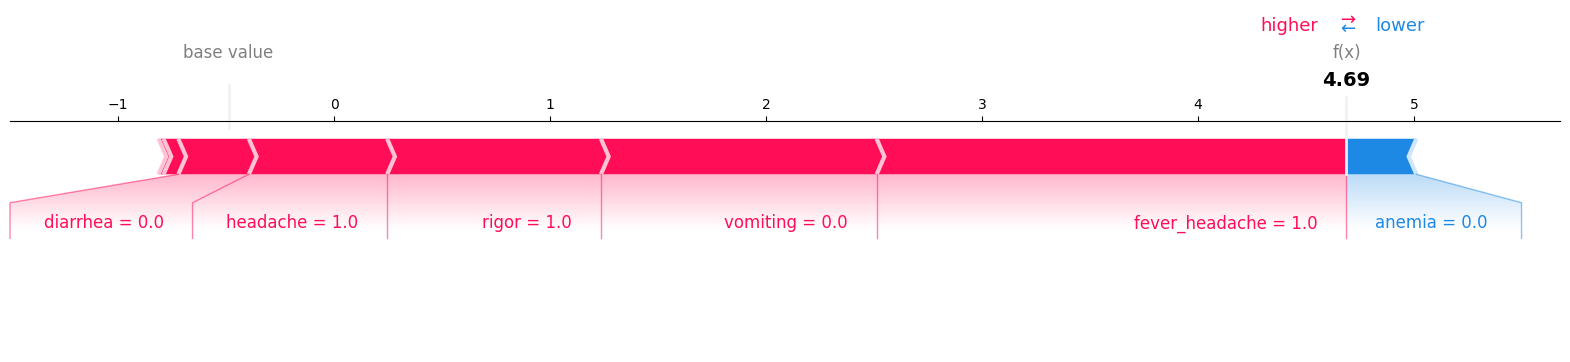

In [63]:
CLASS_IDX = 1  
idx = 1       

shap.initjs()
shap.force_plot(
    explainer.expected_value[CLASS_IDX],   # base value for this class
    shap_values.values[idx, :, CLASS_IDX], # SHAP values for this sample and class
    X_test_sel.iloc[idx],
    matplotlib=True,
    show=True
)

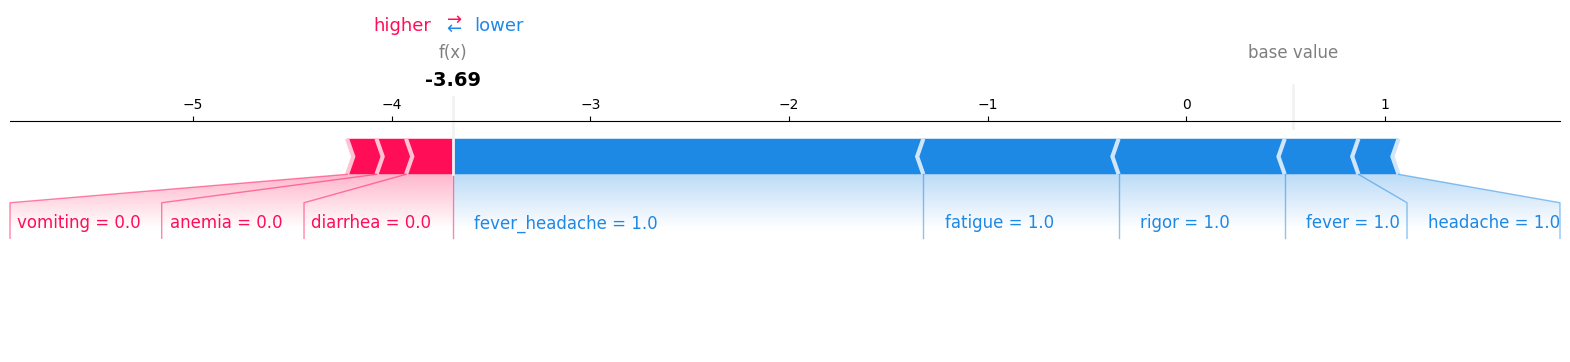

In [64]:
CLASS_IDX = 2  
idx = 2       

shap.initjs()
shap.force_plot(
    explainer.expected_value[CLASS_IDX],   # base value for this class
    shap_values.values[idx, :, CLASS_IDX], # SHAP values for this sample and class
    X_test_sel.iloc[idx],
    matplotlib=True,
    show=True
)

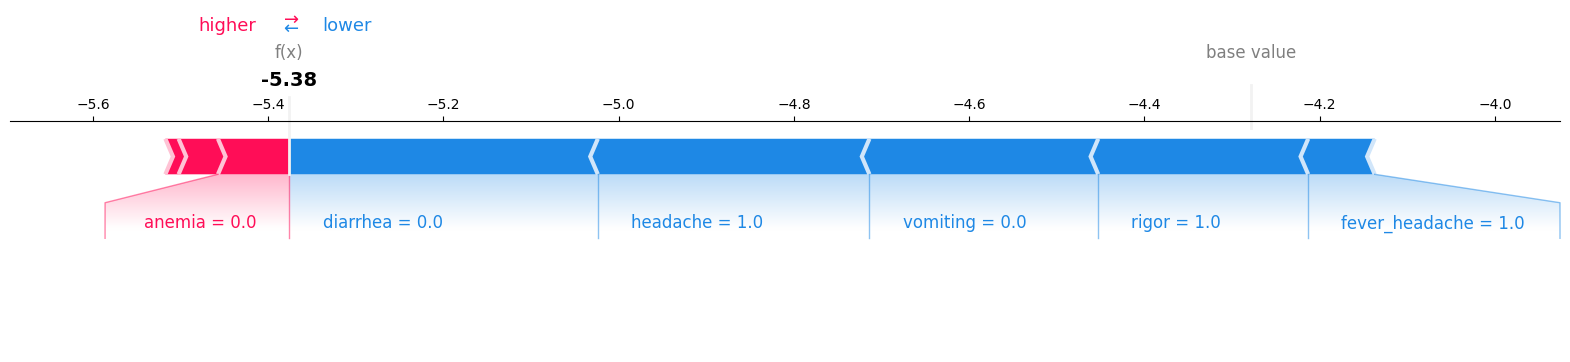

In [65]:
CLASS_IDX = 3  
idx = 3       

shap.initjs()
shap.force_plot(
    explainer.expected_value[CLASS_IDX],   # base value for this class
    shap_values.values[idx, :, CLASS_IDX], # SHAP values for this sample and class
    X_test_sel.iloc[idx],
    matplotlib=True,
    show=True
)

## 5.4 Partial Dependence Plots

Pick top features from SHAP summary

In [32]:
import numpy as np

# feature_importances is (n_features,) from SHAP values
feature_importances = np.abs(shap_values.values).mean(0)
top_indices = np.argsort(-feature_importances)[:3]

# Now ensure each entry is a single column name (string)
top_features = [X_test_sel.columns[i] for i in top_indices]

print("Top features:", top_features)
print("Types:", [type(f) for f in top_features])  # Should all be <class 'str'>

Top features: [Index(['fatigue', 'rigor', 'fever', 'headache'], dtype='object'), Index(['rigor', 'fatigue', 'headache', 'fever'], dtype='object'), Index(['fatigue', 'fever', 'rigor', 'headache'], dtype='object')]
Types: [<class 'pandas.core.indexes.base.Index'>, <class 'pandas.core.indexes.base.Index'>, <class 'pandas.core.indexes.base.Index'>]


In [33]:
for i, feat in enumerate(top_features):
    print(f"{i}: {feat} - type: {type(feat)}")

0: Index(['fatigue', 'rigor', 'fever', 'headache'], dtype='object') - type: <class 'pandas.core.indexes.base.Index'>
1: Index(['rigor', 'fatigue', 'headache', 'fever'], dtype='object') - type: <class 'pandas.core.indexes.base.Index'>
2: Index(['fatigue', 'fever', 'rigor', 'headache'], dtype='object') - type: <class 'pandas.core.indexes.base.Index'>


In [37]:
# Fix by extracting strings from each Index
top_features = [feat[0] if isinstance(feat, pd.Index) else feat for feat in top_features]

In [39]:
print(model.classes_)

[0 1 2 3]


Classes in model: [0 1 2 3]


C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


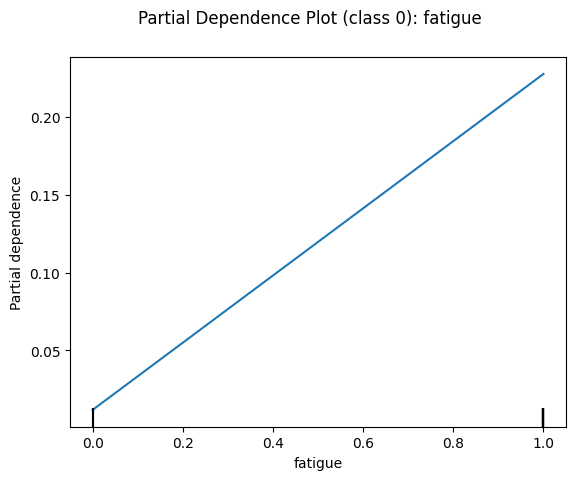

C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


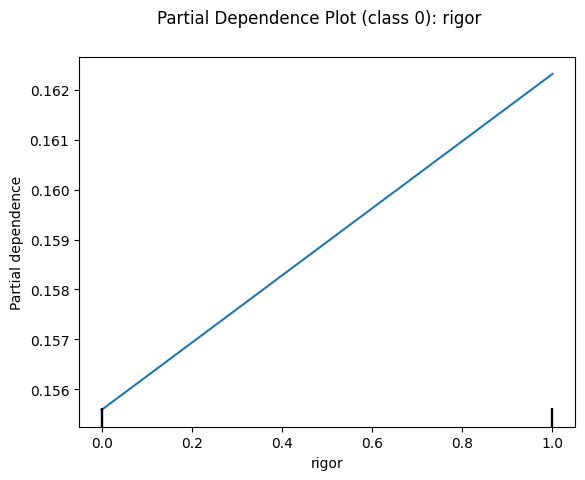

C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


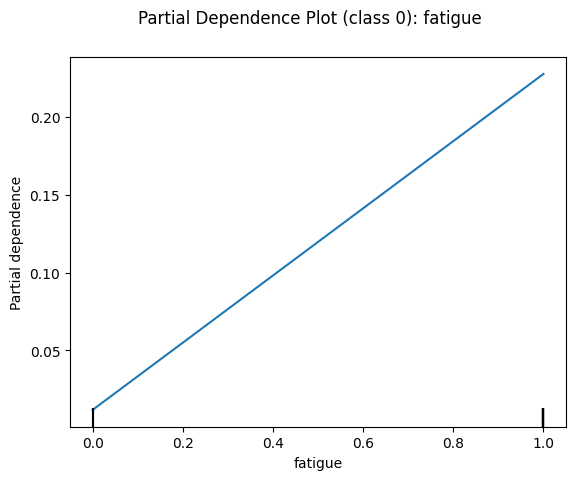

In [40]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Fix: Flatten Index objects
top_features = [feat[0] if isinstance(feat, pd.Index) else feat for feat in top_features]

# Optional: See your model classes
print("Classes in model:", model.classes_)

for feat in top_features:
    if feat not in X_test_sel.columns:
        print(f"Skipping invalid feature: {feat}")
        continue

    PartialDependenceDisplay.from_estimator(
        model,
        X_test_sel,
        features=[feat],
        feature_names=X_test_sel.columns,
        target=0  # Change this to 1 or 2 to inspect other classes
    )
    plt.suptitle(f'Partial Dependence Plot (class 0): {feat}')
    plt.show()

Classes in model: [0 1 2 3]


C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


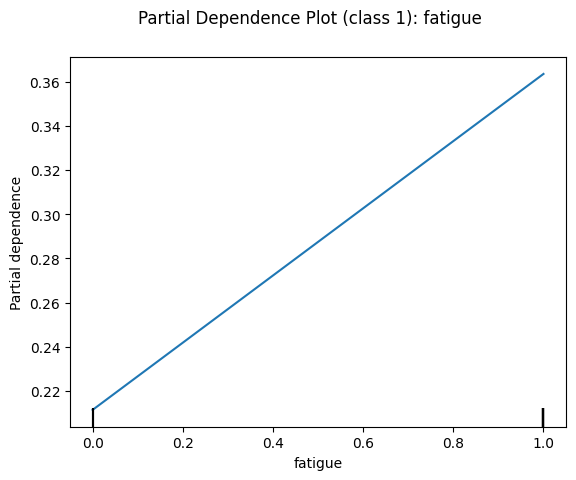

C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


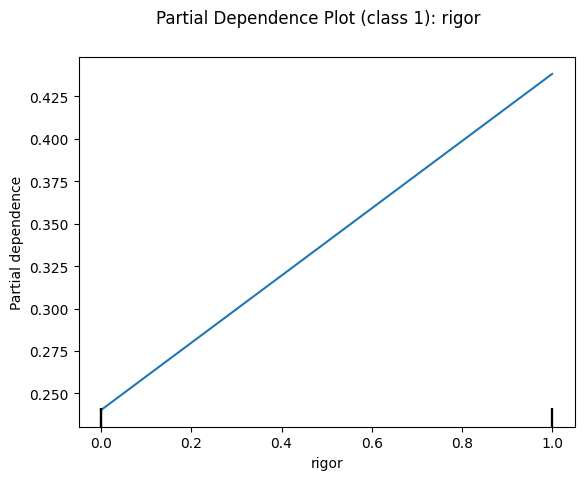

C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


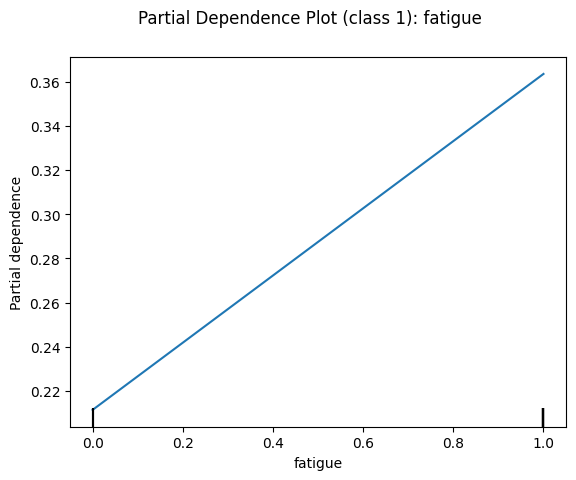

In [44]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Fix: Flatten Index objects
top_features = [feat[0] if isinstance(feat, pd.Index) else feat for feat in top_features]

print("Classes in model:", model.classes_)

for feat in top_features:
    if feat not in X_test_sel.columns:
        print(f"Skipping invalid feature: {feat}")
        continue

    PartialDependenceDisplay.from_estimator(
        model,
        X_test_sel,
        features=[feat],
        feature_names=X_test_sel.columns,
        target=1  
    )
    plt.suptitle(f'Partial Dependence Plot (class 1): {feat}')
    plt.show()


Classes in model: [0 1 2 3]


C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


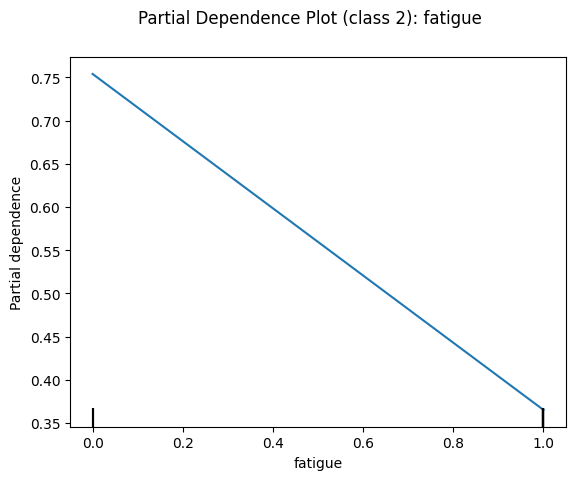

C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


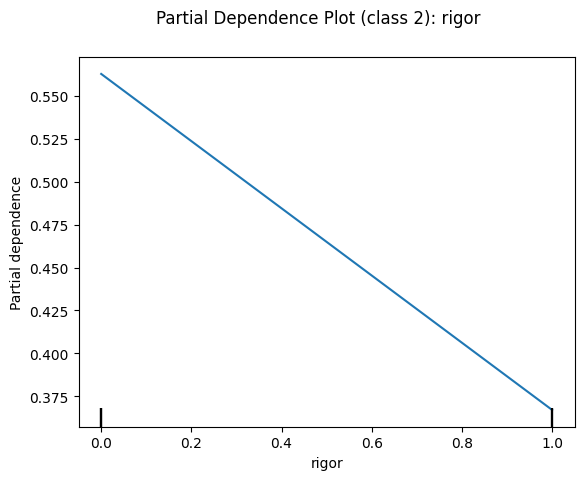

C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


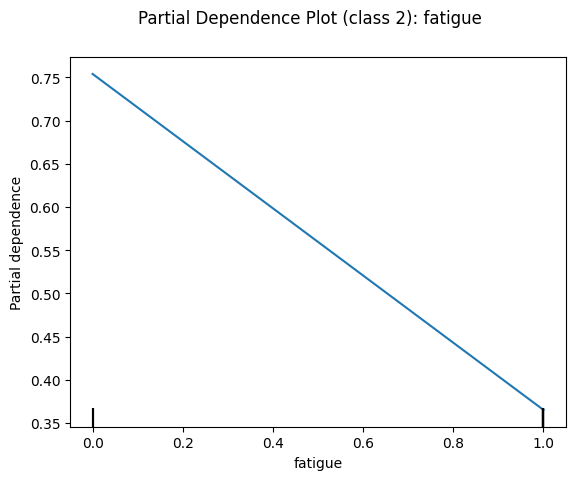

In [45]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Fix: Flatten Index objects
top_features = [feat[0] if isinstance(feat, pd.Index) else feat for feat in top_features]

print("Classes in model:", model.classes_)

for feat in top_features:
    if feat not in X_test_sel.columns:
        print(f"Skipping invalid feature: {feat}")
        continue

    PartialDependenceDisplay.from_estimator(
        model,
        X_test_sel,
        features=[feat],
        feature_names=X_test_sel.columns,
        target=2  
    )
    plt.suptitle(f'Partial Dependence Plot (class 2): {feat}')
    plt.show()


Classes in model: [0 1 2 3]


C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


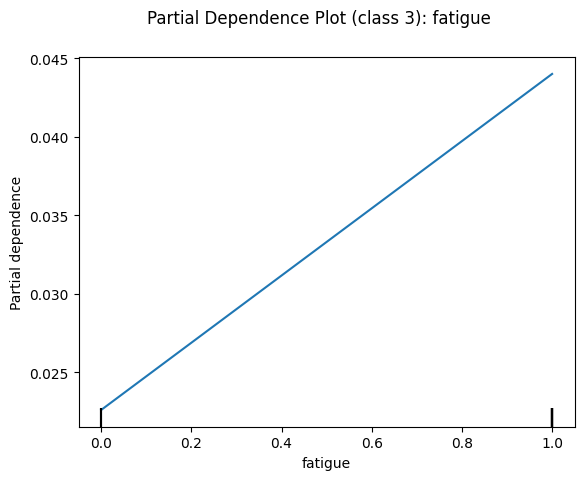

C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


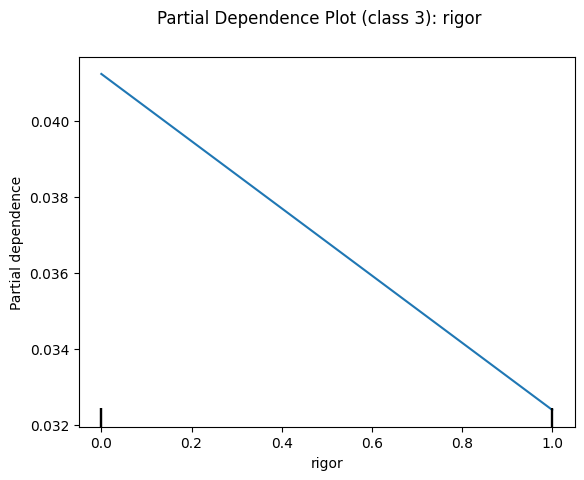

C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\sklearn\inspection\_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


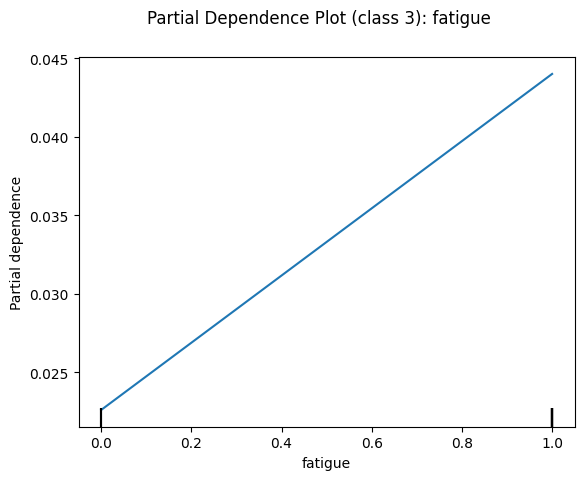

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Fix: Flatten Index objects
top_features = [feat[0] if isinstance(feat, pd.Index) else feat for feat in top_features]

print("Classes in model:", model.classes_)

for feat in top_features:
    if feat not in X_test_sel.columns:
        print(f"Skipping invalid feature: {feat}")
        continue

    PartialDependenceDisplay.from_estimator(
        model,
        X_test_sel,
        features=[feat],
        feature_names=X_test_sel.columns,
        target=3  
    )
    plt.suptitle(f'Partial Dependence Plot (class 3): {feat}')
    plt.show()


## 5.5 Feature Importance Table

In [54]:
# Collapse class dimension by averaging over it
importances = np.abs(shap_values.values).mean(axis=0).mean(axis=1)  # mean over classes and samples
print("Fixed importance shape:", importances.shape)

Fixed importance shape: (8,)


In [ ]:
# Multi-class SHAP returns a list of arrays per class
print(type(shap_values))  


<class 'shap._explanation.Explanation'>


In [62]:
feat_imp = pd.DataFrame({
    'feature': X_test_sel.columns,
    'importance': importances
})
feat_imp = feat_imp.sort_values('importance', ascending=False)
display(feat_imp.head(10))

,feature,importance
7,fever_headache,1.704039
4,vomiting,0.969493
2,fatigue,0.879860
5,diarrhea,0.738408
1,rigor,0.630003
3,headache,0.337914
6,anemia,0.296807
0,fever,0.189738


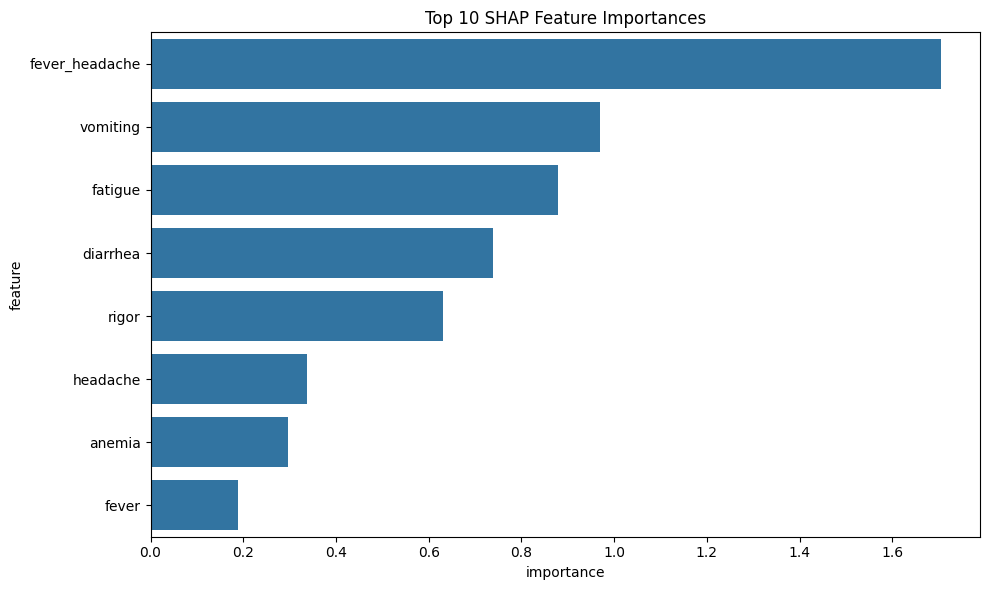

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(10), x='importance', y='feature')
plt.title('Top 10 SHAP Feature Importances')
plt.tight_layout()
plt.show()

## 5.6 Automated Reporting and Insights

In [ ]:
acc = model.score(X_test_sel, y_test)
print(f"Model accuracy on test set: {acc:.2%}\n")
print("Most important features (global):", feat_imp.head(5)['feature'].tolist())

Model accuracy on test set: 99.75%

Most important features (global): ['fever_headache', 'vomiting', 'fatigue', 'diarrhea', 'rigor']


In [59]:
print("Class distribution in predictions:", pd.Series(model.predict(X_test_sel)).value_counts())

Class distribution in predictions: 2    193
1    128
0     64
3     15
Name: count, dtype: int64


In [60]:
#joblib.dump(model, 'models/best_model.joblib')
feat_imp.to_csv('C:\\Users\\555555\\Malaria-Typhoid-ML-Diagnosis\\outputs\\feature_importances.csv', index=False)